### Gobal Model é uma caracteristica do Neural Prophet, a evolução do FBProphet que não permite multiplas previsões, já o NeuralProphet permite desde que os dados estejam em uma única coluna com uma coluna ID adicional para identificar a região. **E isso muda tudo!**

In [ ]:
!pip uninstall -y torch notebook notebook_shim tensorflow tensorflow-datasets prophet torchaudio torchdata torchtext torchvision

!pip install neuralprophet


In [2]:
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level

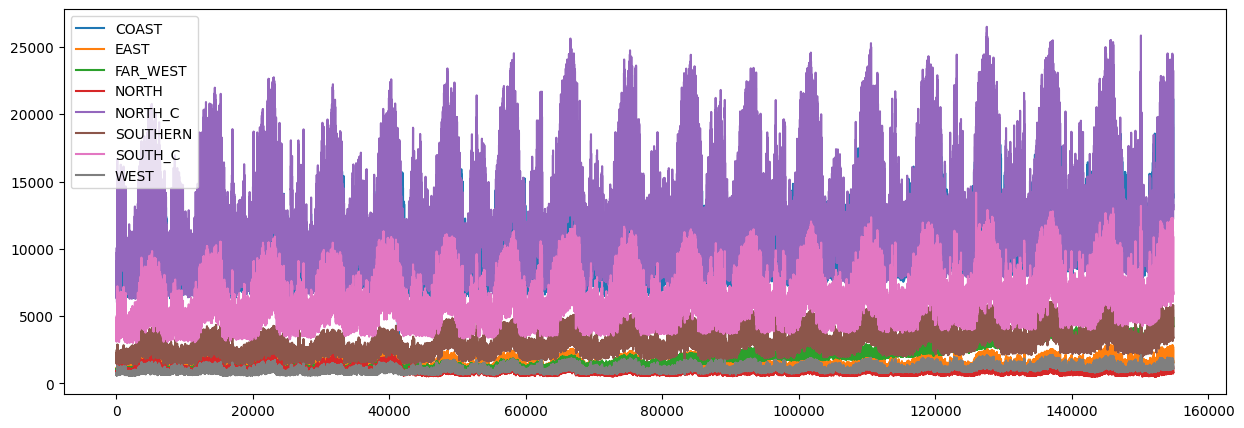

In [7]:
df = pd.read_csv(
    "https://github.com/ourownstory/neuralprophet-data/raw/main/datasets/multivariate/load_ercot_regions.csv"
)
fig = df.plot(figsize=(15, 5))

In [4]:
df.head()

ds    COAST    EAST  FAR_WEST   NORTH  NORTH_C  SOUTHERN  \
0  2004-01-01 01:00:00  7225.09  877.79   1044.89  745.79  7124.21   1660.45   
1  2004-01-01 02:00:00  6994.25  850.75   1032.04  721.34  6854.58   1603.52   
2  2004-01-01 03:00:00  6717.42  831.63   1021.10  699.70  6639.48   1527.99   
3  2004-01-01 04:00:00  6554.27  823.56   1015.41  691.84  6492.39   1473.89   
4  2004-01-01 05:00:00  6511.19  823.38   1009.74  686.76  6452.26   1462.76   

   SOUTH_C    WEST  
0  3639.12  654.61  
1  3495.16  639.88  
2  3322.70  623.42  
3  3201.72  613.49  
4  3163.74  613.32

In [9]:
# Here we use the same dataset only preprocessed to match NeuralProphet's input format
df_one_region = pd.read_csv("https://github.com/ourownstory/neuralprophet-data/raw/main/datasets/multivariate/ercot-panel.csv")
df_one_region.head()

# Disable log messages below error
set_log_level("ERROR")

# Base model
m = NeuralProphet()
m.set_plotting_backend("plotly")
metrics = m.fit(df_one_region, freq="H")
forecast = m.predict(df_one_region)
m.plot(forecast, df_name="NORTH_C")

Finding best initial lr:   0%|          | 0/283 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

In [16]:
df_one_region['ID'].unique()

array(['COAST', 'EAST', 'FAR_WEST', 'NORTH', 'NORTH_C', 'SOUTHERN',
       'SOUTH_C', 'WEST'], dtype=object)

In [13]:
df

ds     COAST     EAST  FAR_WEST   NORTH   NORTH_C  \
0       2004-01-01 01:00:00   7225.09   877.79   1044.89  745.79   7124.21   
1       2004-01-01 02:00:00   6994.25   850.75   1032.04  721.34   6854.58   
2       2004-01-01 03:00:00   6717.42   831.63   1021.10  699.70   6639.48   
3       2004-01-01 04:00:00   6554.27   823.56   1015.41  691.84   6492.39   
4       2004-01-01 05:00:00   6511.19   823.38   1009.74  686.76   6452.26   
...                     ...       ...      ...       ...     ...       ...   
154849  2021-08-31 20:00:00  14477.26  1594.07   4307.99  832.71  13920.14   
154850  2021-08-31 21:00:00  14044.85  1565.64   4252.85  799.24  13308.33   
154851  2021-08-31 22:00:00  13796.10  1519.51   4213.14  777.39  12938.13   
154852  2021-08-31 23:00:00  13746.95  1498.90   4188.78  768.89  12876.06   
154853  2021-09-01 00:00:00  14035.90  1542.56   4216.02  787.35  13245.11   

        SOUTHERN  SOUTH_C     WEST  
0        1660.45  3639.12   654.61  
1        1603.52  3495.16   639.88  
2        1527.99  3322.70   623.42  
3        1473.89  3201.72   613.49  
4        1462.76  3163.74   613.32  
...          ...      ...      ...  
154849   3666.45  7113.79  1150.02  
154850   3503.66  6805.93  1112.36  
154851   3396.58  6611.26  1086.27  
154852   3340.30  6589.14  1075.76  
154853   3387.29  6753.29  1090.01  

[154854 rows x 9 columns]

In [14]:
m = NeuralProphet(
    trend_global_local="local",
    season_global_local="local",
)
m.set_plotting_backend("plotly")
metrics = m.fit(df_one_region, freq="H")
forecast = m.predict(df_one_region)
m.plot(forecast, df_name="NORTH_C")

Finding best initial lr:   0%|          | 0/283 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]

Predicting: 1644it [00:00, ?it/s]